# Waveform Fitting of Receiver Functions
# (Using Multiple Processors)

This notebook demonstrates waveform fitting of receiver function to retrieve Moho structure based on [rfsed](https://github.com/akinremisa/rfsed) package

The required functions are first imported 

In [1]:
#%% Example of Waveform Fitting with Multiprocessor
import os
import numpy as np
from obspy.geodetics.base import kilometer2degrees
from rfsed.WaveformFittingMultiproc import WaveformPara, run_waveformfitting, plotbestmodel
from rfsed.util import rfMoho_example, save_plot

The path to save the results is defined

In [2]:
#----------------------------------------------------------
savedir=save_plot()
savepath = savedir + '/WaveformFittingMultiproc/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)

The receiver function data is defined and the Moho parameters.

In [3]:
rfstream= rfMoho_example()
preonset=10 
VpSed=3.3
HSed=1.8
VpCrust = 6.9
gauparameter=1.25
# KMoho= np.linspace(1.65,1.95,121)
# HMoho=np.linspace(20,60,201)
# Option to use smaller grid search discretization for faster testing
KMoho= np.linspace(1.65,1.95,20)
HMoho=np.linspace(25,50,20)
#----------------------------------------------------------
# Average Ray parameter
# allrayp = []
# for tr in rfstream:
#     rp = kilometer2degrees(1) * tr.stats['slowness']
#     allrayp.append(rp)
# allrayp=np.array(allrayp)
# rayp=np.mean(allrayp)
rayp=0.053
#----------------------------------------------------------
delta = rfstream[0].stats.delta
wtCorr=0.8
wtRMSE=0.1
wtPG=0.1
format='pdf'
nproc=30

The waveform fitting analysis is performed and the results are visualised and saved

Best Model from Correlation Coefficient: Moho at 32.89 km with Vp/Vs of 1.68
Best Model from RMSE: Moho at 34.21 km with Vp/Vs of 1.65
Best Model from PG: Moho at 30.26 km with Vp/Vs of 1.95
Best Model from Overall Goodness of Fit: Moho at 32.89 km with Vp/Vs of 1.71


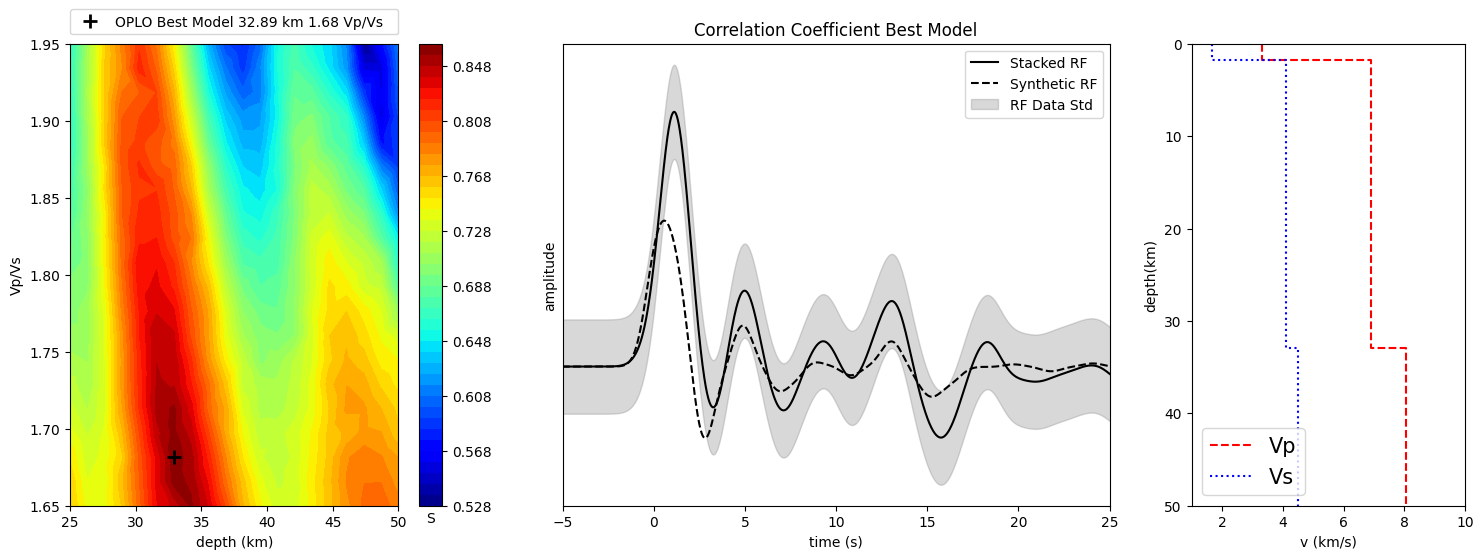

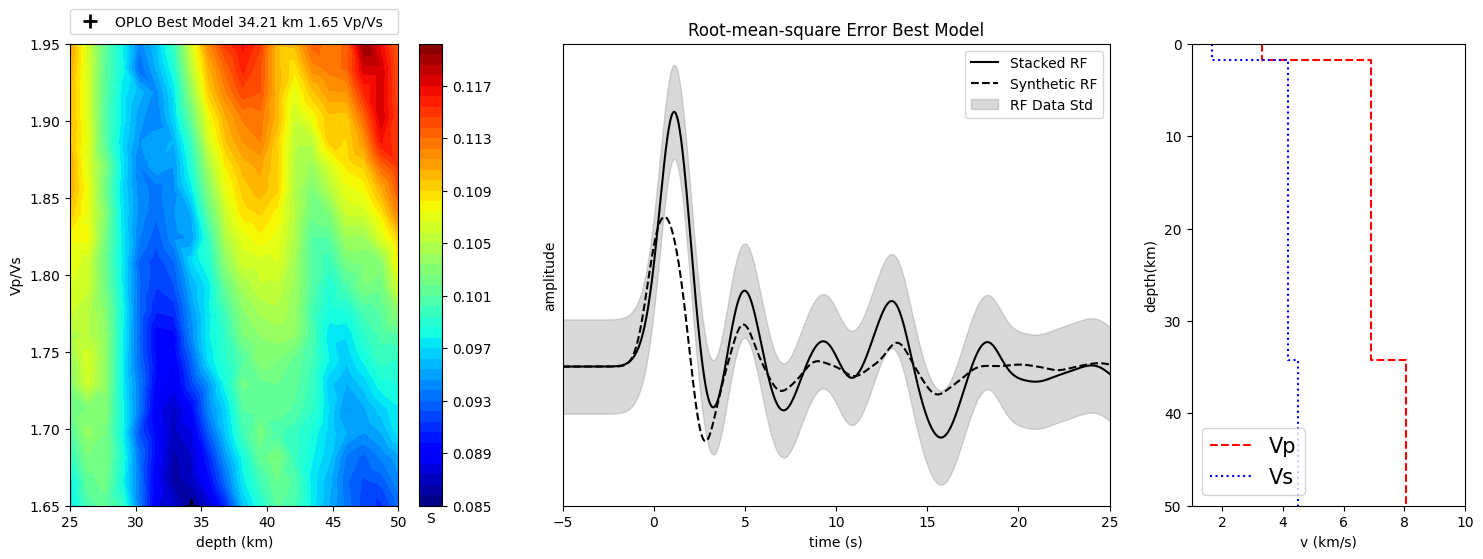

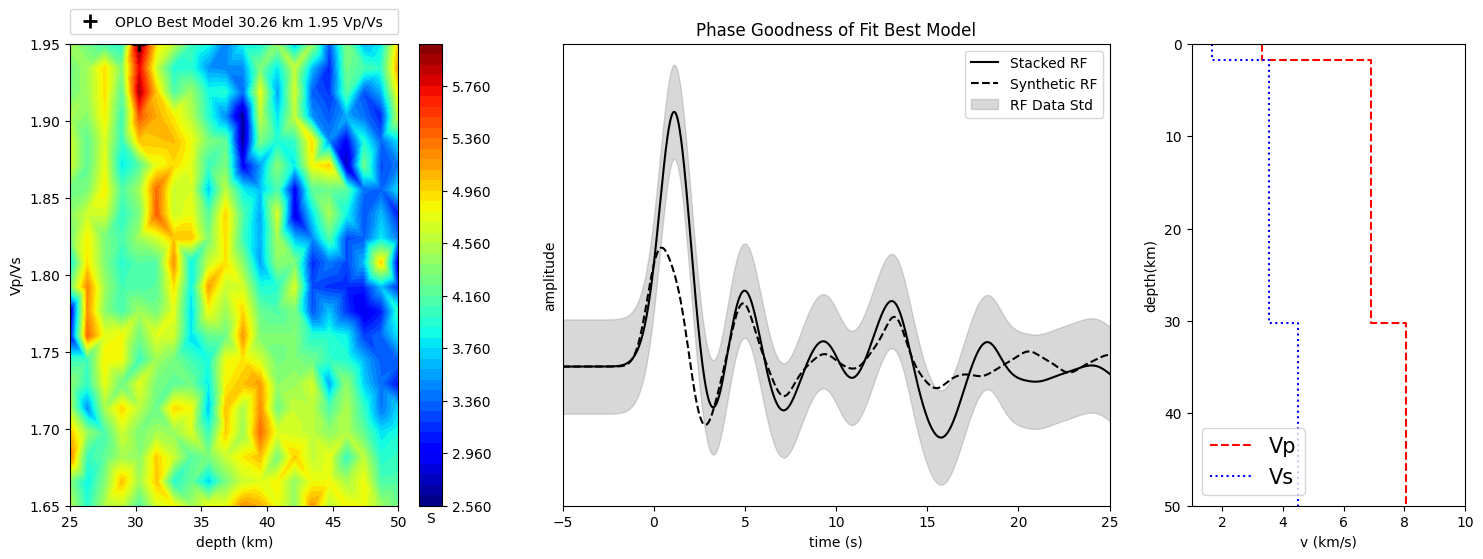

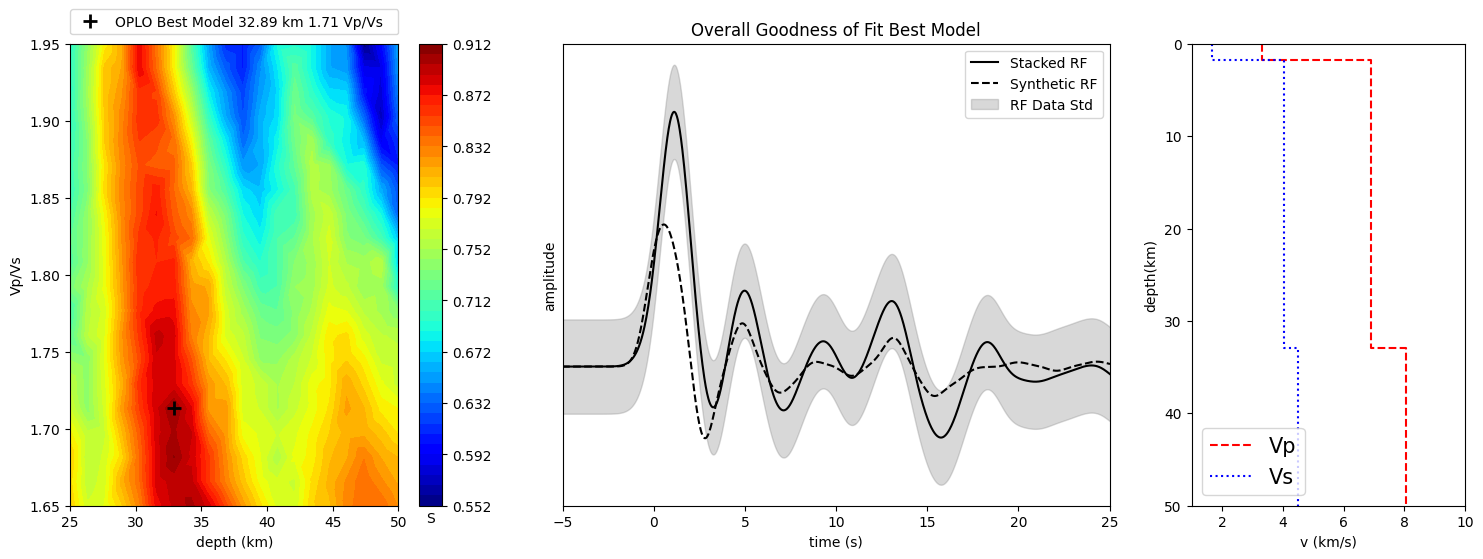

In [4]:
ModelParams=WaveformPara(rfstream, preonset, HSed, VpSed, VpCrust, rayp, KMoho, HMoho, gauparameter)
Results=run_waveformfitting(nproc, HMoho, ModelParams)
plotbestmodel(Results, ModelParams, wtCorr, wtRMSE, wtPG, savepath, format)